# NLP(Natural Language Processing) 

# 크롤링한 데이터 파일을 이용한 한국어 분석

<span style="color: red; font-size: 18pt">
1. 한국어 분석에 필요한 모듈 임포트하기
</span> 

In [3]:
from konlpy.tag import *      
import pandas as pd

#konlpy.tag 에서 제공되는 함수 Okt(), Kkma( ) 호출 
okt = Okt() 
kkma = Kkma( )

<span style="color: red; font-size: 18pt">
2. 한국어 데이터셋에서 문장 추출하기
</span> 

<span style="color:blue; font-size: 14pt">
데이터셋 파일을 pandas를 활용하여 읽기  <b>(return type - DataFrame)
</span> 

<span style="color:#0000ff">  
● pandas에서 제공하는 read_csv()함수, read_excel()함수는 데이터를 읽어서 DataFrame타입으로 리턴한다.   
</span>    

In [4]:
file_path = "C:/Users/Mac001/DataSci/자연어처리.csv"
data_read = pd.read_csv(file_path, encoding='utf-8')  

#file_path = "c:/temp/자연어처리.xlsx"
#data_read = pd.read_excel(file_path)  

print(type(data_read))

<class 'pandas.core.frame.DataFrame'>


In [3]:
data_read

,번호,제목,내용,작성자,작성일
0,1,트링크AI는 지역관광 솔루션입니다,"텍스트 마이닝, 대화형 자연어 처리 기술로 강화된 인공지능이 해답을 제시합니다. 3...",t-link,21시간 전
1,2,패스트캠퍼스 챌린지 10일차(수요일),ly/3FVdhDa #패스트캠퍼스 #패캠챌린지 #직장인인강 #직장인자기계발 #패스트...,HELLO WORLD!,22시간 전
2,3,"다급한 기업, IT인재 직접 키워…컴공·전산 서울 대졸자 추월",이 프로그램은 자연어 처리 기법을 활용해 법률 문서의 내용이 잘 요약된 문장을......,긍정적 변수,23시간 전
3,4,"2021년 11월 9일 상한가(갤럭시아에스엠, 셀바스AI, 하이트론...","음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제...",흔하디 흔한 아카시아꿀의 이야기,어제
4,5,인공지능을 넘어 인공자아의 시대로 도약,일각에서는 2032년이면 GPT-3보다 1000배의 학습처리능력을 가진 인공지능이 ...,IITP 정보통신기획평가원,어제
...,...,...,...,...,...
95,96,"딥러닝, 머신러닝, 인공지능 차이점 알아보기",자연어 처리 4. 추천시스템 이렇게 4가지 분야에서 다양하게 사용되고 있더라고요. ...,티오더,6일 전
96,97,"과기정통부, ‘인공지능 그랜드 챌린지’ 진행","5차 대회는 AI 기술을 활용한 수학 문제 해결을 주제로, 자연어 이해와 수리적.....",뉴스앤잡,6일 전
97,98,콴다라는 별이 뜨고 메가스터디는 지고 있네,요새는 자연어처리 AI를 통해 문자로 하는 질문에 대해서도 답변할 수 있도록 하는 ...,거인의 어깨에 올라 부자되기,6일 전
98,99,수지군청 전화안내시스템에 음성합성기 ReadSpeaker™ 혜련...,"성우, #자연어처리, #TTS프로그램, #콜센터, #아나운서, #영어 교육, #DN...",A Global leader of voice technology.,6일 전


In [5]:
data_title = data_read['제목'].values  #제목 부분만 추출 

print('●  데이터 타입 : ', type(data_title))  #데이터 타입 numpy.ndarray
print('●  제목 개수 : ', len(data_title)) 
print('● ', data_title)

●  데이터 타입 :  <class 'numpy.ndarray'>
●  제목 개수 :  100
●  ['트링크AI는 지역관광 솔루션입니다' '패스트캠퍼스 챌린지 10일차(수요일)'
 '다급한 기업, IT인재 직접 키워…컴공·전산 서울 대졸자 추월'
 '2021년 11월 9일 상한가(갤럭시아에스엠, 셀바스AI, 하이트론...' '인공지능을 넘어 인공자아의 시대로 도약'
 '[디지털 시대의 전공들] 중앙대학교 소프트웨어 학부' '셀바스AI-우리가 모르는 메타버스 수혜주, 절대적 저평가...'
 'NVIDIA, 신규 Jetson AGX Orin 공개' '메타버스 관련주로 떠오르는 셀바스AI +78% 성공'
 '[GIP 뉴스레터_11월 2주] 넷플릭스가 게임 만든다고?' '[자바공부] 자바알고리즘이란 무엇인가?'
 '파이썬의 강력함을 느낄 수 있는 「한 권으로 다지는 머신...' '11/10 주린이의 받아쓰는 시황정리(feat. 삼프로 tv)'
 '[월230/수원] 삼성전기 AI인공지능 챗봇 트레이너'
 "[영상] 전상호 코어에이아이(kore.ai,) 상무, '대화형 AI..." '빅 데이터란? 특징과 의미를 알아봅니다.'
 '[개발 2유닛] 무하유의 서비스를 만들어가는 “서비스...' '[에임리치] 비트코인 시총 3조 달러 근접… ‘ETH’ 급등...'
 '11월 10일 삼프로 티비 - 월가모닝라이브, 오늘아침라이브' '"공식의 아름다움" 원자폭탄에서 비트코인까지 세상을 바꾼...'
 'Meta의 AI 전략 (AI 시리즈 1)' '21,11,10 검색조회수가장많은 단어키워드 상위노출유입분석'
 '멀티캠퍼스 인공지능 자연어처리(NLP) 기반 기업 데이터 분석...'
 '(211109) 셀바스AI - 우리가 모르는 메타버스 수혜주, 절대적...'
 '셀바스AI 주가 전망 : 인공지능, 메타버스, 음성인식 관련주' '2021/11/09'
 '마이크로소프트(MSFT)도 메타버스에 합류! 그에 대한 완벽 분석!' '셀바스AI 주가 숨겨진 메타버스 수혜주 기대감에 상한가'
 

In [5]:
num = 1
for i in data_title  :
    print('제목', num, ')', i)
    num += 1

제목 1 ) 트링크AI는 지역관광 솔루션입니다
제목 2 ) 패스트캠퍼스 챌린지 10일차(수요일)
제목 3 ) 다급한 기업, IT인재 직접 키워…컴공·전산 서울 대졸자 추월
제목 4 ) 2021년 11월 9일 상한가(갤럭시아에스엠, 셀바스AI, 하이트론...
제목 5 ) 인공지능을 넘어 인공자아의 시대로 도약
제목 6 ) [디지털 시대의 전공들] 중앙대학교 소프트웨어 학부
제목 7 ) 셀바스AI-우리가 모르는 메타버스 수혜주, 절대적 저평가...
제목 8 ) NVIDIA, 신규 Jetson AGX Orin 공개
제목 9 ) 메타버스 관련주로 떠오르는 셀바스AI +78% 성공
제목 10 ) [GIP 뉴스레터_11월 2주] 넷플릭스가 게임 만든다고?
제목 11 ) [자바공부] 자바알고리즘이란 무엇인가?
제목 12 ) 파이썬의 강력함을 느낄 수 있는 「한 권으로 다지는 머신...
제목 13 ) 11/10 주린이의 받아쓰는 시황정리(feat. 삼프로 tv)
제목 14 ) [월230/수원] 삼성전기 AI인공지능 챗봇 트레이너
제목 15 ) [영상] 전상호 코어에이아이(kore.ai,) 상무, '대화형 AI...
제목 16 ) 빅 데이터란? 특징과 의미를 알아봅니다.
제목 17 ) [개발 2유닛] 무하유의 서비스를 만들어가는 “서비스...
제목 18 ) [에임리치] 비트코인 시총 3조 달러 근접… ‘ETH’ 급등...
제목 19 ) 11월 10일 삼프로 티비 - 월가모닝라이브, 오늘아침라이브
제목 20 ) "공식의 아름다움" 원자폭탄에서 비트코인까지 세상을 바꾼...
제목 21 ) Meta의 AI 전략 (AI 시리즈 1)
제목 22 ) 21,11,10 검색조회수가장많은 단어키워드 상위노출유입분석
제목 23 ) 멀티캠퍼스 인공지능 자연어처리(NLP) 기반 기업 데이터 분석...
제목 24 ) (211109) 셀바스AI - 우리가 모르는 메타버스 수혜주, 절대적...
제목 25 ) 셀바스AI 주가 전망 : 인공지능, 메타버스, 음성인식 관련주
제목 26 ) 2021/11/09

In [6]:
data_contents = data_read['내용'].values  #내용 부분만 추출 

print('●  데이터 타입 : ', type(data_contents))  #데이터 타입 numpy.ndarray
print('●  내용 개수 : ', len(data_contents))  
print('● ', data_contents )

●  데이터 타입 :  <class 'numpy.ndarray'>
●  내용 개수 :  100
●  ['텍스트 마이닝, 대화형 자연어 처리 기술로 강화된 인공지능이 해답을 제시합니다. 3. 모든 담당자가 쉽게 인사이트를 활용할 수 있도록 시각화 자료를 제공합니다....'
 'ly/3FVdhDa #패스트캠퍼스 #패캠챌린지 #직장인인강 #직장인자기계발 #패스트캠퍼스후기 #김기현의딥러닝을활용한자연어처리입문올인원패키지Online'
 '이 프로그램은 자연어 처리 기법을 활용해 법률 문서의 내용이 잘 요약된 문장을... 신경망처리장치(NPU) 개발을 위 해선 컴퓨터공학을 비롯한 소프트웨어에 대한...'
 '음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제공하고... 이 회사는 건축용 자재를 제조하는 데크 플레이트 부문, 조선용 철판을 표면처리...'
 '일각에서는 2032년이면 GPT-3보다 1000배의 학습처리능력을 가진 인공지능이 탄생할... 또한, 일반 상식에 대한 이미지나 자연어 처리가 가능하도록, 상식을 객관적으로...'
 '영상처리 4학년 캡스톤디자인(2), 멀티코어컴퓨팅, 무선이동통신, 네트워크응용설계, 정보보호이론, 생체인식및응용, 자연어처리및정보검색, 패턴인식, 컴퓨터비전...'
 '음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제 공하고 있다. 셀바스AI의 음성기술을 주목해야한다. 각 도메 인별 데이터 학습을 통해 98...'
 '향상된 처리능력, 이전 세대인 Jetson AGX Xavier의 폼팩터 및 핀에 대한... 이는 개발자가 자연어 이해, 3D 인식, 멀티센서 퓨전 등과 관련된 엣지(edge)...'
 '영상지능, 자연어처리 등 HCI 기술 경쟁력을 강화하고 있다고 재벌투자연구소 전문가분께서 알려주셨습니다 주식 후기에서 가장 중요한 수익 이야기를 해볼까...'
 '대표적으로 신약개발, 배터리 성능 개선, 날씨 예측, 주식 선별, 양자 자연어처리, 이동경로 최적화, 교통 관리, 

In [7]:
num = 1
for i in data_contents  :
    print('내용', num, ')', i)
    print('-'*50)
    num += 1

내용 1 ) 텍스트 마이닝, 대화형 자연어 처리 기술로 강화된 인공지능이 해답을 제시합니다. 3. 모든 담당자가 쉽게 인사이트를 활용할 수 있도록 시각화 자료를 제공합니다....
--------------------------------------------------
내용 2 ) ly/3FVdhDa #패스트캠퍼스 #패캠챌린지 #직장인인강 #직장인자기계발 #패스트캠퍼스후기 #김기현의딥러닝을활용한자연어처리입문올인원패키지Online
--------------------------------------------------
내용 3 ) 이 프로그램은 자연어 처리 기법을 활용해 법률 문서의 내용이 잘 요약된 문장을... 신경망처리장치(NPU) 개발을 위 해선 컴퓨터공학을 비롯한 소프트웨어에 대한...
--------------------------------------------------
내용 4 ) 음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제공하고... 이 회사는 건축용 자재를 제조하는 데크 플레이트 부문, 조선용 철판을 표면처리...
--------------------------------------------------
내용 5 ) 일각에서는 2032년이면 GPT-3보다 1000배의 학습처리능력을 가진 인공지능이 탄생할... 또한, 일반 상식에 대한 이미지나 자연어 처리가 가능하도록, 상식을 객관적으로...
--------------------------------------------------
내용 6 ) 영상처리 4학년 캡스톤디자인(2), 멀티코어컴퓨팅, 무선이동통신, 네트워크응용설계, 정보보호이론, 생체인식및응용, 자연어처리및정보검색, 패턴인식, 컴퓨터비전...
--------------------------------------------------
내용 7 ) 음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제 공하고 있다. 셀바스AI의 음성기술을 주목해야한다. 각 도메 인별 

In [11]:
data_tit_con = '■ 제목 : ' + data_title + ' ■ 내용 : ' + data_contents

In [12]:
data_tit_con

array(['■ 제목 : 트링크AI는 지역관광 솔루션입니다 ■ 내용 : 텍스트 마이닝, 대화형 자연어 처리 기술로 강화된 인공지능이 해답을 제시합니다. 3. 모든 담당자가 쉽게 인사이트를 활용할 수 있도록 시각화 자료를 제공합니다....',
       '■ 제목 : 패스트캠퍼스 챌린지 10일차(수요일) ■ 내용 : ly/3FVdhDa #패스트캠퍼스 #패캠챌린지 #직장인인강 #직장인자기계발 #패스트캠퍼스후기 #김기현의딥러닝을활용한자연어처리입문올인원패키지Online',
       '■ 제목 : 다급한 기업, IT인재 직접 키워…컴공·전산 서울 대졸자 추월 ■ 내용 : 이 프로그램은 자연어 처리 기법을 활용해 법률 문서의 내용이 잘 요약된 문장을... 신경망처리장치(NPU) 개발을 위 해선 컴퓨터공학을 비롯한 소프트웨어에 대한...',
       '■ 제목 : 2021년 11월 9일 상한가(갤럭시아에스엠, 셀바스AI, 하이트론... ■ 내용 : 음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제공하고... 이 회사는 건축용 자재를 제조하는 데크 플레이트 부문, 조선용 철판을 표면처리...',
       '■ 제목 : 인공지능을 넘어 인공자아의 시대로 도약 ■ 내용 : 일각에서는 2032년이면 GPT-3보다 1000배의 학습처리능력을 가진 인공지능이 탄생할... 또한, 일반 상식에 대한 이미지나 자연어 처리가 가능하도록, 상식을 객관적으로...',
       '■ 제목 : [디지털 시대의 전공들] 중앙대학교 소프트웨어 학부 ■ 내용 : 영상처리 4학년 캡스톤디자인(2), 멀티코어컴퓨팅, 무선이동통신, 네트워크응용설계, 정보보호이론, 생체인식및응용, 자연어처리및정보검색, 패턴인식, 컴퓨터비전...',
       '■ 제목 : 셀바스AI-우리가 모르는 메타버스 수혜주, 절대적 저평가... ■ 내용 : 음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제 공하고 있다. 셀바스AI의 음성기술을 주목해

In [13]:
#제목과 내용 
print('● 데이터 타입 : ', type(data_tit_con))
print('● shape : ', data_tit_con.shape)  #1차원 리스트 개념 
print('● 데이터 개수 : ',len(data_tit_con))  

● 데이터 타입 :  <class 'numpy.ndarray'>
● shape :  (100,)
● 데이터 개수 :  100


In [14]:
num = 1

for i in data_tit_con :
    print('제목과 내용', num, ')', i)
    print(type(i))
    print('-'*50)
    num += 1

제목과 내용 1 ) ■ 제목 : 트링크AI는 지역관광 솔루션입니다 ■ 내용 : 텍스트 마이닝, 대화형 자연어 처리 기술로 강화된 인공지능이 해답을 제시합니다. 3. 모든 담당자가 쉽게 인사이트를 활용할 수 있도록 시각화 자료를 제공합니다....
<class 'str'>
--------------------------------------------------
제목과 내용 2 ) ■ 제목 : 패스트캠퍼스 챌린지 10일차(수요일) ■ 내용 : ly/3FVdhDa #패스트캠퍼스 #패캠챌린지 #직장인인강 #직장인자기계발 #패스트캠퍼스후기 #김기현의딥러닝을활용한자연어처리입문올인원패키지Online
<class 'str'>
--------------------------------------------------
제목과 내용 3 ) ■ 제목 : 다급한 기업, IT인재 직접 키워…컴공·전산 서울 대졸자 추월 ■ 내용 : 이 프로그램은 자연어 처리 기법을 활용해 법률 문서의 내용이 잘 요약된 문장을... 신경망처리장치(NPU) 개발을 위 해선 컴퓨터공학을 비롯한 소프트웨어에 대한...
<class 'str'>
--------------------------------------------------
제목과 내용 4 ) ■ 제목 : 2021년 11월 9일 상한가(갤럭시아에스엠, 셀바스AI, 하이트론... ■ 내용 : 음성인식(STT), 음성합성(TTS), 자연어처리, 필기인식 등의 AI 솔루션을 제공하고... 이 회사는 건축용 자재를 제조하는 데크 플레이트 부문, 조선용 철판을 표면처리...
<class 'str'>
--------------------------------------------------
제목과 내용 5 ) ■ 제목 : 인공지능을 넘어 인공자아의 시대로 도약 ■ 내용 : 일각에서는 2032년이면 GPT-3보다 1000배의 학습처리능력을 가진 인공지능이 탄생할... 또한, 일반 상식에 대한 이미지나 자연어 처리가 가능하도록, 상식을 객관적으로...
<class 

<span style="color: red; font-size: 18pt">
3. 문장에서 [(형태소, 품사)] 및 명사 추출하기
</span> 

<span style="color: magenta ; font-size: 18pt">
● Okt() 활용한 한국어 분석 
</span>

<span style="color: red ; font-size: 14pt">
3.1. pos() 함수를 이용한 [(형태소, 품사)] 추출하기 
</span>

In [15]:
okt_pos=[]  #형태소와 품사 부분 저장을 위한 리스트

for data in data_tit_con : 
    #형태소와 품사 부분 리스트에 추가 
    #okt.pos()는 리스트 안에 (튜플)을 넣어서 리턴
    #okt_pos는 리스트이고,okt.pos() 결과도 리스트이므로 2차원리스트 생성 
    
    okt_pos.append(okt.pos(data)) 

In [16]:
#바깥쪽 리스트 안에 또 하나의 리스트가 포함되어 있으며
#내부 리스트 안에 튜플이 있는 구조

print(okt_pos)  

[[('■', 'Foreign'), ('제목', 'Noun'), (':', 'Punctuation'), ('트', 'Noun'), ('링크', 'Noun'), ('AI', 'Alpha'), ('는', 'Verb'), ('지역', 'Noun'), ('관광', 'Noun'), ('솔루션', 'Noun'), ('입니다', 'Adjective'), ('■', 'Foreign'), ('내용', 'Noun'), (':', 'Punctuation'), ('텍스트', 'Noun'), ('마', 'Noun'), ('이닝', 'Noun'), (',', 'Punctuation'), ('대화', 'Noun'), ('형', 'Suffix'), ('자연어', 'Noun'), ('처리', 'Noun'), ('기술', 'Noun'), ('로', 'Josa'), ('강화', 'Noun'), ('된', 'Verb'), ('인공', 'Noun'), ('지능', 'Noun'), ('이', 'Josa'), ('해답', 'Noun'), ('을', 'Josa'), ('제시', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation'), ('3', 'Number'), ('.', 'Punctuation'), ('모든', 'Noun'), ('담당자', 'Noun'), ('가', 'Josa'), ('쉽게', 'Verb'), ('인사이트', 'Noun'), ('를', 'Josa'), ('활용', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있도록', 'Adjective'), ('시각', 'Noun'), ('화', 'Suffix'), ('자료', 'Noun'), ('를', 'Josa'), ('제공', 'Noun'), ('합니다', 'Verb'), ('....', 'Punctuation')], [('■', 'Foreign'), ('제목', 'Noun'), (':', 'Punctuation'), ('패스트', 'Noun'), ('캠퍼스', 'Noun'), ('챌

In [21]:
import numpy as np
print('● 데이터 타입 : ', type(okt_pos)) 
print("● [(형태소, 품사), ...(형태소, 품사)] 리스트 개수 : ", len(okt_pos) )

● 데이터 타입 :  <class 'list'>
● [(형태소, 품사), ...(형태소, 품사)] 리스트 개수 :  100


In [22]:
okt_pos

[[('■', 'Foreign'),
  ('제목', 'Noun'),
  (':', 'Punctuation'),
  ('트', 'Noun'),
  ('링크', 'Noun'),
  ('AI', 'Alpha'),
  ('는', 'Verb'),
  ('지역', 'Noun'),
  ('관광', 'Noun'),
  ('솔루션', 'Noun'),
  ('입니다', 'Adjective'),
  ('■', 'Foreign'),
  ('내용', 'Noun'),
  (':', 'Punctuation'),
  ('텍스트', 'Noun'),
  ('마', 'Noun'),
  ('이닝', 'Noun'),
  (',', 'Punctuation'),
  ('대화', 'Noun'),
  ('형', 'Suffix'),
  ('자연어', 'Noun'),
  ('처리', 'Noun'),
  ('기술', 'Noun'),
  ('로', 'Josa'),
  ('강화', 'Noun'),
  ('된', 'Verb'),
  ('인공', 'Noun'),
  ('지능', 'Noun'),
  ('이', 'Josa'),
  ('해답', 'Noun'),
  ('을', 'Josa'),
  ('제시', 'Noun'),
  ('합니다', 'Verb'),
  ('.', 'Punctuation'),
  ('3', 'Number'),
  ('.', 'Punctuation'),
  ('모든', 'Noun'),
  ('담당자', 'Noun'),
  ('가', 'Josa'),
  ('쉽게', 'Verb'),
  ('인사이트', 'Noun'),
  ('를', 'Josa'),
  ('활용', 'Noun'),
  ('할', 'Verb'),
  ('수', 'Noun'),
  ('있도록', 'Adjective'),
  ('시각', 'Noun'),
  ('화', 'Suffix'),
  ('자료', 'Noun'),
  ('를', 'Josa'),
  ('제공', 'Noun'),
  ('합니다', 'Verb'),
  ('....', 'Punctu

In [23]:
okt_pos_result =[ ]

#바깥쪽 리스트 okt_pos에서 안쪽 리스트 pos에 해당하는 100개의 리스트를 반복
for pos in okt_pos : 
    for i in pos :   #안쪽 리스트 pos에서 각각의 튜플 i를 반복
        okt_pos_result.append(i)  #(튜플) i 값을 추가하는 리스트 pos_result 

In [24]:
print(okt_pos_result) #하나의 리스트 안에 튜플들이 있는 구조

[('■', 'Foreign'), ('제목', 'Noun'), (':', 'Punctuation'), ('트', 'Noun'), ('링크', 'Noun'), ('AI', 'Alpha'), ('는', 'Verb'), ('지역', 'Noun'), ('관광', 'Noun'), ('솔루션', 'Noun'), ('입니다', 'Adjective'), ('■', 'Foreign'), ('내용', 'Noun'), (':', 'Punctuation'), ('텍스트', 'Noun'), ('마', 'Noun'), ('이닝', 'Noun'), (',', 'Punctuation'), ('대화', 'Noun'), ('형', 'Suffix'), ('자연어', 'Noun'), ('처리', 'Noun'), ('기술', 'Noun'), ('로', 'Josa'), ('강화', 'Noun'), ('된', 'Verb'), ('인공', 'Noun'), ('지능', 'Noun'), ('이', 'Josa'), ('해답', 'Noun'), ('을', 'Josa'), ('제시', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation'), ('3', 'Number'), ('.', 'Punctuation'), ('모든', 'Noun'), ('담당자', 'Noun'), ('가', 'Josa'), ('쉽게', 'Verb'), ('인사이트', 'Noun'), ('를', 'Josa'), ('활용', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있도록', 'Adjective'), ('시각', 'Noun'), ('화', 'Suffix'), ('자료', 'Noun'), ('를', 'Josa'), ('제공', 'Noun'), ('합니다', 'Verb'), ('....', 'Punctuation'), ('■', 'Foreign'), ('제목', 'Noun'), (':', 'Punctuation'), ('패스트', 'Noun'), ('캠퍼스', 'Noun'), ('챌', 

In [25]:
print('● 데이터 타입 : ', type(okt_pos_result)) 
print('● shape : ', np.shape(okt_pos_result))
print("● 리스트에 있는 튜플 개수 : ", len(okt_pos_result))      

● 데이터 타입 :  <class 'list'>
● shape :  (5496, 2)
● 리스트에 있는 튜플 개수 :  5496


<span style="color: red ; font-size: 14pt">
3.2. nouns() 함수를 이용한 명사 추출하기 
</span>

In [26]:
okt_nouns=[]  #명사 부분 저장을 위한 리스트

for data in data_tit_con : 
    #명사 부분 리스트에 추가 
    #okt.nouns()는 리스트 안에 '스트링'을 넣어서 리턴
    #okt_nouns는 리스트이고,okt.nouns() 결과도 리스트이므로 2차원리스트 생성 
    
    okt_nouns.append(okt.nouns(data))        

In [27]:
#바깥쪽 리스트 안에 또 하나의 리스트가 포함되어 있으며
#내부 리스트 안에 튜플이 있는 구조

print(okt_nouns)  

[['제목', '트', '링크', '지역', '관광', '솔루션', '내용', '텍스트', '마', '이닝', '대화', '자연어', '처리', '기술', '강화', '인공', '지능', '해답', '제시', '모든', '담당자', '인사이트', '활용', '수', '시각', '자료', '제공'], ['제목', '패스트', '캠퍼스', '린지', '수요일', '내용'], ['제목', '기업', '인재', '직접', '컴공', '전산', '서울', '대졸', '추월', '내용', '이', '프로그램', '자연어', '처리', '기법', '활용', '법률', '문서', '내용', '요약', '문장', '신경망', '처리장치', '개발', '위', '해선', '컴퓨터공학', '비롯', '소프트웨어', '대한'], ['제목', '상한', '갤럭시', '에스', '엠', '셀', '바스', '하이', '트론', '내용', '음성인식', '음성합성', '자연어', '처리', '필기', '인식', '등', '솔루션', '제공', '이', '회사', '건축', '용', '자재', '제조', '데크', '플레이', '트', '부문', '선용', '철판', '표면처리'], ['제목', '인공', '지능', '인공', '자아', '시대', '도약', '내용', '일각', '배', '학습', '처리', '능력', '인공', '지능', '탄생', '또한', '일반', '상식', '대한', '이미지', '자연어', '처리', '상식', '객관'], ['제목', '디지털', '시대', '전공', '중앙', '대학교', '소프트웨어', '학부', '내용', '상처리', '학년', '캡', '스톤', '디자인', '멀티코어', '컴퓨팅', '무선', '이동통신', '네트워크', '응용', '설계', '정보보호', '이론', '생체인식', '및', '응용', '자연어', '처리', '및', '정보검색', '패턴인식', '컴퓨터'], ['제목', '셀', '바스', '우리', '메타', '버스

In [28]:
print('● 데이터 타입 : ', type(okt_nouns)) 
print("● ['스트링', ...'스트링'] 리스트 개수 : ", len(okt_nouns) )

● 데이터 타입 :  <class 'list'>
● ['스트링', ...'스트링'] 리스트 개수 :  100


In [29]:
okt_nouns_result =[ ]

#바깥쪽 리스트 okt_nouns에서 안쪽 리스트 nouns에 해당하는 100개의 리스트를 반복
for nouns in okt_nouns : 
    for i in nouns :   #안쪽 리스트 nouns에서 각각의 '스트링' i를 반복
        okt_nouns_result.append(i)  #'스트링' i 값을 추가하는 리스트 nouns_result 

In [30]:
print(okt_nouns_result) #하나의 리스트 안에 '스트링'이 있는 구조

['제목', '트', '링크', '지역', '관광', '솔루션', '내용', '텍스트', '마', '이닝', '대화', '자연어', '처리', '기술', '강화', '인공', '지능', '해답', '제시', '모든', '담당자', '인사이트', '활용', '수', '시각', '자료', '제공', '제목', '패스트', '캠퍼스', '린지', '수요일', '내용', '제목', '기업', '인재', '직접', '컴공', '전산', '서울', '대졸', '추월', '내용', '이', '프로그램', '자연어', '처리', '기법', '활용', '법률', '문서', '내용', '요약', '문장', '신경망', '처리장치', '개발', '위', '해선', '컴퓨터공학', '비롯', '소프트웨어', '대한', '제목', '상한', '갤럭시', '에스', '엠', '셀', '바스', '하이', '트론', '내용', '음성인식', '음성합성', '자연어', '처리', '필기', '인식', '등', '솔루션', '제공', '이', '회사', '건축', '용', '자재', '제조', '데크', '플레이', '트', '부문', '선용', '철판', '표면처리', '제목', '인공', '지능', '인공', '자아', '시대', '도약', '내용', '일각', '배', '학습', '처리', '능력', '인공', '지능', '탄생', '또한', '일반', '상식', '대한', '이미지', '자연어', '처리', '상식', '객관', '제목', '디지털', '시대', '전공', '중앙', '대학교', '소프트웨어', '학부', '내용', '상처리', '학년', '캡', '스톤', '디자인', '멀티코어', '컴퓨팅', '무선', '이동통신', '네트워크', '응용', '설계', '정보보호', '이론', '생체인식', '및', '응용', '자연어', '처리', '및', '정보검색', '패턴인식', '컴퓨터', '제목', '셀', '바스', '우리', '메타', '버스', '혜주', '절대'

In [31]:
print('● 데이터 타입 : ', type(okt_nouns_result)) 
print('● shape : ', np.shape(okt_nouns_result))
print("● 리스트에 있는 튜플 개수 : ", len(okt_nouns_result))   

● 데이터 타입 :  <class 'list'>
● shape :  (2631,)
● 리스트에 있는 튜플 개수 :  2631


<span style="color: red; font-size: 18pt">
4. 명사의 빈도수 출력하기   
</span> 

<span style="color: blue; font-size: 14pt">
okt.nouns()를 대상으로 Counter()로 명사 빈도수 출력하기
</span> 

<span style="color: blue">
● collections 모듈에서 제공되는 Counter 함수를 사용하여 명사의 빈도수를 출력
</span> 

In [32]:
from collections import Counter

In [33]:
#print(okt_nouns_result) #준비된 명사 리스트 확인
print("명사 개수 : ", len(okt_nouns_result))

명사 개수 :  2631


In [34]:
#Counter는 from collections import Counter에서 제공되는 함수

okt_nouns_count = Counter(okt_nouns_result)  

print('● 데이터 타입 : ',type(okt_nouns_count))
print('● {명사 : 개수} ',okt_nouns_count)

● 데이터 타입 :  <class 'collections.Counter'>
● {명사 : 개수}  Counter({'처리': 122, '자연어': 106, '내용': 105, '제목': 101, '기술': 66, '등': 39, '지능': 36, '인공': 28, '분석': 28, '데이터': 26, '셀': 22, '바스': 22, '및': 20, '메타': 20, '버스': 20, '음성인식': 19, '인식': 15, '수': 14, '이': 14, '음성합성': 14, '개발': 13, '러닝': 13, '솔루션': 12, '위': 12, '필기': 11, '통해': 11, '기반': 11, '서비스': 11, '를': 11, '활용': 10, '제공': 10, '기업': 10, '관련': 10, '투자': 10, '언어': 10, '딥': 10, '사용': 10, '빅데이터': 10, '모델': 10, '대화': 9, '음성': 9, '것': 9, '문제': 9, '텍스트': 8, '대한': 8, '이해': 8, '영상': 8, '평가': 7, '주식': 7, '자율': 7, '주행': 7, '린지': 6, '학습': 6, '이미지': 6, '컴퓨터': 6, '경쟁력': 6, '가장': 6, '로보틱스': 6, '헬': 6, '스케': 6, '의미': 6, '검색': 6, '키': 6, '로': 6, '중': 6, '정보': 6, '분야': 6, '마인': 6, '랩': 6, '엔비디아': 6, '대회': 6, '프로그램': 5, '상한': 5, '하이': 5, '트론': 5, '회사': 5, '의': 5, '주': 5, '양자': 5, '알고리즘': 5, '주가': 5, '진행': 5, '황': 5, '나': 5, '일정': 5, '연구': 5, '합성': 5, '논문': 5, '사람': 5, '최신': 5, '마': 4, '이닝': 4, '캠퍼스': 4, '문장': 4, '소프트웨어': 4, '갤럭시': 4, '디지털': 4, '응용': 4, '절

<span style="color: red; font-size: 18pt">
5. 불용어 사전을 이용한 불필요한 명사 제거하기
</span> 

<span style="color: blue; font-size: 14pt">
불용어 사전을 read()로 읽기 (return type : string) 
</span> 

In [35]:
stop_word = open("C:/Users/Mac001/DataSci/불용어사전.txt", encoding='utf-8').read()
print('● 불용어 사전 데이터 타입 : ',type(stop_word))
print('● 불용어 사전 내용 ')  
print(stop_word)  #print()를 사용하면 '\n'이 출력되지 않는다.

● 불용어 사전 데이터 타입 :  <class 'str'>
● 불용어 사전 내용 
자연어
처리
제목
내용


<span style="color: blue; font-size: 14pt">
불용어 사전을 기반으로 저장된 명사 데이터셋에서 불용어 제거하기
</span> 

<span style="color:green">  
● 파이썬 문법 참고 <br>
</span>    

In [36]:
#파이썬 문법 참고
#0 에서 9까지 1씩 증가하면서
#x를 2로 나누어서 나머지가 0 인 경우.. 
#즉 짝수인 경우 x만 M에 할당하는 코드 

M = [x for x in range(10) if x % 2 == 0]
print(M)

[0, 2, 4, 6, 8]


In [37]:
#print("● okt.nouns()를 활용하여 추출된 명사 : %d 개" %len(okt_nouns))
#print(okt_nouns,'\n')

In [38]:
stop_okt = [ i for i in okt_nouns_result if i in stop_word ] 
          #i가 stop_word에 있으면 i를 stop_okt에 할당한다. 
          #stop_word는 \n 단위로 비교된다.
print("● 추출된 명사가 불용어에 해당되는 명사 : %d 개" %len(stop_okt))
print(stop_okt,'\n')

● 추출된 명사가 불용어에 해당되는 명사 : 443 개
['제목', '내용', '자연어', '처리', '제목', '내용', '제목', '내용', '자연어', '처리', '내용', '제목', '내용', '자연어', '처리', '용', '제목', '내용', '처리', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제', '제목', '내용', '처리', '자연어', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '처리', '내용', '처리', '자연어', '제목', '내용', '처리', '자연어', '처리', '자연어', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '제목', '내용', '자연어', '처리', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '처리', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '제목', '자연', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '자연어', '처리', '내용', '자연어', '처리', '내용', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '자', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '처리', '자연어', '제목', '내용', '처리', '자연어', '처리', '제목', '내용', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '제목', '내용', '자연어', '처리', '

In [39]:
non_stop_okt = [ j for j in okt_nouns_result if j not in stop_word ] 
         #j가 stop_word(불용어)에 없으면 j를 non_stop_okt에 할당한다. 
         #stop_word는 \n 단위로 비교된다.
print("● 추출된 명사가 불용어에 해당되지 않는 명사 : %d 개" %len(non_stop_okt))
print(non_stop_okt)

● 추출된 명사가 불용어에 해당되지 않는 명사 : 2188 개
['트', '링크', '지역', '관광', '솔루션', '텍스트', '마', '이닝', '대화', '기술', '강화', '인공', '지능', '해답', '제시', '모든', '담당자', '인사이트', '활용', '수', '시각', '자료', '제공', '패스트', '캠퍼스', '린지', '수요일', '기업', '인재', '직접', '컴공', '전산', '서울', '대졸', '추월', '이', '프로그램', '기법', '활용', '법률', '문서', '요약', '문장', '신경망', '처리장치', '개발', '위', '해선', '컴퓨터공학', '비롯', '소프트웨어', '대한', '상한', '갤럭시', '에스', '엠', '셀', '바스', '하이', '트론', '음성인식', '음성합성', '필기', '인식', '등', '솔루션', '제공', '이', '회사', '건축', '자재', '제조', '데크', '플레이', '트', '부문', '선용', '철판', '표면처리', '인공', '지능', '인공', '자아', '시대', '도약', '일각', '배', '학습', '능력', '인공', '지능', '탄생', '또한', '일반', '상식', '대한', '이미지', '상식', '객관', '디지털', '시대', '전공', '중앙', '대학교', '소프트웨어', '학부', '상처리', '학년', '캡', '스톤', '디자인', '멀티코어', '컴퓨팅', '무선', '이동통신', '네트워크', '응용', '설계', '정보보호', '이론', '생체인식', '및', '응용', '및', '정보검색', '패턴인식', '컴퓨터', '셀', '바스', '우리', '메타', '버스', '혜주', '절대', '평가', '음성인식', '음성합성', '필기', '인식', '등', '솔루션', '공', '셀', '바스', '의', '음성', '기술', '주목', '각', '도메', '인별', '데이터', '학습', '통해', '신

<span style="color: red; font-size: 18pt">
6. 글자 수 제한으로 불용어 제거 추가하기
</span> 

<span style="color: blue; font-size: 14pt">
불용어 사전을 통과한 okt.nouns()를 대상으로 글자 수 제한으로 불용어 제거하기
</span>

In [40]:
print("● 불용어 사전을 통과한 명사 개수 : %d 개" %len(non_stop_okt))
print("● 불용어 사전을 통과한 명사" )
print(non_stop_okt)

● 불용어 사전을 통과한 명사 개수 : 2188 개
● 불용어 사전을 통과한 명사
['트', '링크', '지역', '관광', '솔루션', '텍스트', '마', '이닝', '대화', '기술', '강화', '인공', '지능', '해답', '제시', '모든', '담당자', '인사이트', '활용', '수', '시각', '자료', '제공', '패스트', '캠퍼스', '린지', '수요일', '기업', '인재', '직접', '컴공', '전산', '서울', '대졸', '추월', '이', '프로그램', '기법', '활용', '법률', '문서', '요약', '문장', '신경망', '처리장치', '개발', '위', '해선', '컴퓨터공학', '비롯', '소프트웨어', '대한', '상한', '갤럭시', '에스', '엠', '셀', '바스', '하이', '트론', '음성인식', '음성합성', '필기', '인식', '등', '솔루션', '제공', '이', '회사', '건축', '자재', '제조', '데크', '플레이', '트', '부문', '선용', '철판', '표면처리', '인공', '지능', '인공', '자아', '시대', '도약', '일각', '배', '학습', '능력', '인공', '지능', '탄생', '또한', '일반', '상식', '대한', '이미지', '상식', '객관', '디지털', '시대', '전공', '중앙', '대학교', '소프트웨어', '학부', '상처리', '학년', '캡', '스톤', '디자인', '멀티코어', '컴퓨팅', '무선', '이동통신', '네트워크', '응용', '설계', '정보보호', '이론', '생체인식', '및', '응용', '및', '정보검색', '패턴인식', '컴퓨터', '셀', '바스', '우리', '메타', '버스', '혜주', '절대', '평가', '음성인식', '음성합성', '필기', '인식', '등', '솔루션', '공', '셀', '바스', '의', '음성', '기술', '주목', '각', '도메', '인별', '데이터', '학습

In [41]:
refine_non_stop_okt = []

for i in non_stop_okt :  
    #글자수가 2자 ~ 10자에 해당되는 단어만 추출
    if len(i) >= 2 and len(i) <= 10 : 
        refine_non_stop_okt.append(i) 
        
print("● 글자 수가 2~10 사이 명사 : %d 개" %len(refine_non_stop_okt))    
print(refine_non_stop_okt)


● 글자 수가 2~10 사이 명사 : 1828 개
['링크', '지역', '관광', '솔루션', '텍스트', '이닝', '대화', '기술', '강화', '인공', '지능', '해답', '제시', '모든', '담당자', '인사이트', '활용', '시각', '자료', '제공', '패스트', '캠퍼스', '린지', '수요일', '기업', '인재', '직접', '컴공', '전산', '서울', '대졸', '추월', '프로그램', '기법', '활용', '법률', '문서', '요약', '문장', '신경망', '처리장치', '개발', '해선', '컴퓨터공학', '비롯', '소프트웨어', '대한', '상한', '갤럭시', '에스', '바스', '하이', '트론', '음성인식', '음성합성', '필기', '인식', '솔루션', '제공', '회사', '건축', '자재', '제조', '데크', '플레이', '부문', '선용', '철판', '표면처리', '인공', '지능', '인공', '자아', '시대', '도약', '일각', '학습', '능력', '인공', '지능', '탄생', '또한', '일반', '상식', '대한', '이미지', '상식', '객관', '디지털', '시대', '전공', '중앙', '대학교', '소프트웨어', '학부', '상처리', '학년', '스톤', '디자인', '멀티코어', '컴퓨팅', '무선', '이동통신', '네트워크', '응용', '설계', '정보보호', '이론', '생체인식', '응용', '정보검색', '패턴인식', '컴퓨터', '바스', '우리', '메타', '버스', '혜주', '절대', '평가', '음성인식', '음성합성', '필기', '인식', '솔루션', '바스', '음성', '기술', '주목', '도메', '인별', '데이터', '학습', '통해', '신규', '공개', '향상', '능력', '이전', '세대', '폼팩터', '대한', '개발자', '이해', '인식', '멀티', '센서', '퓨전', '관련', '엣지', '메타', '버스',

<span style="color: red; font-size: 18pt">
7. 불용어가 제거된 명사를 대상으로 빈도수 다시 출력하기 
</span>

<span style="color: blue; font-size: 14pt">
불용어가 제거된 okt.nouns()를 대상으로 명사의 빈도수 출력하기 
</span>    

In [42]:
#Counter는 from collections import Counter에서 제공되는 함수

re_okt_nouns_count = Counter(refine_non_stop_okt)  

#collections.Counter타입은 딕셔너리의 value를 기준으로 내림차순 정렬
print('● 데이터 타입 : ',type(re_okt_nouns_count))
print('● {명사 : 개수} ',re_okt_nouns_count)

● 데이터 타입 :  <class 'collections.Counter'>
● {명사 : 개수}  Counter({'기술': 66, '지능': 36, '인공': 28, '분석': 28, '데이터': 26, '바스': 22, '메타': 20, '버스': 20, '음성인식': 19, '인식': 15, '음성합성': 14, '개발': 13, '러닝': 13, '솔루션': 12, '필기': 11, '통해': 11, '기반': 11, '서비스': 11, '활용': 10, '제공': 10, '기업': 10, '관련': 10, '투자': 10, '언어': 10, '사용': 10, '빅데이터': 10, '모델': 10, '대화': 9, '음성': 9, '문제': 9, '텍스트': 8, '대한': 8, '이해': 8, '영상': 8, '평가': 7, '주식': 7, '자율': 7, '주행': 7, '린지': 6, '학습': 6, '이미지': 6, '컴퓨터': 6, '경쟁력': 6, '가장': 6, '로보틱스': 6, '스케': 6, '의미': 6, '검색': 6, '정보': 6, '분야': 6, '마인': 6, '엔비디아': 6, '대회': 6, '프로그램': 5, '상한': 5, '하이': 5, '트론': 5, '회사': 5, '양자': 5, '알고리즘': 5, '주가': 5, '진행': 5, '일정': 5, '연구': 5, '합성': 5, '논문': 5, '사람': 5, '최신': 5, '이닝': 4, '캠퍼스': 4, '문장': 4, '소프트웨어': 4, '갤럭시': 4, '디지털': 4, '응용': 4, '절대': 4, '예측': 4, '관리': 4, '머신': 4, '구축': 4, '챗봇': 4, '복합': 4, '에이': 4, '비트코인': 4, '인간': 4, '마이크로소프트': 4, '과정': 4, '센터': 4, '역량': 4, '소개': 4, '한국어': 4, '대규모': 4, '이용': 4, '연설': 4, '주제': 4, '교육': 4, '차량': 4, 

<span style="color: red; font-size: 18pt">
8. 워드 클라우드를 활용하여 명사의 빈도수 시각화
</span>     

wordcloud 공식 홈페이지   
https://amueller.github.io/word_cloud/index.html 

<span style="color: blue; font-size: 14pt">
불용어가 제거된 okt.nouns()를 대상으로 명사의 빈도수를 워드클라우드로 시각화하기 
</span>  

<span style="color: blue">
● WordCloud( )의 generate_from_frequencies( ) 함수 input type 은 dictionary 이고, return type은 image 이다.
</span>  

In [43]:
from wordcloud import WordCloud  

wc = WordCloud(font_path="c:/windows/fonts/HMFMMUEX.TTC" ,  #폰트 설정
                      relative_scaling='auto',  #워드클라우드에 표현될 글자의 상대적 비율 (max:1, auto : 0.5) 
                      background_color='yellow',  #배경색                       
                     ).generate_from_frequencies(re_okt_nouns_count)  #딕셔너리 데이터의 값을 기반으로 워드클라우드를 생성한다.

In [44]:
wc

In [45]:
import matplotlib.pyplot as plt 
#아래의 %matplotlib qt5 코드를 입력하면 시각화 결과가 새로운 윈도우 창에 출력됨
#%matplotlib qt5 

이미지 크기 :  Figure(1400x400)


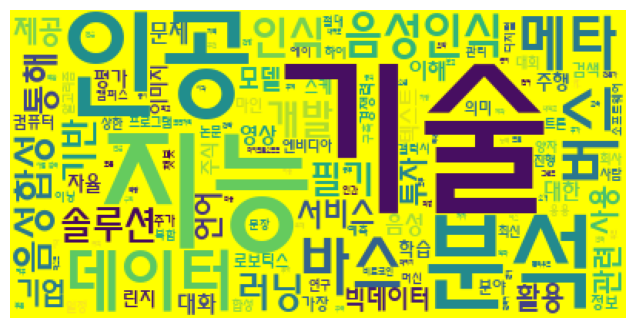

In [46]:
plt.rcParams["figure.figsize"] = (14,4) #가로 너비 14인치, 세로 높이 4인치 
plt.rcParams['axes.grid'] = True   #또는 True
fig = plt.figure() #이미지 크기가 할당됨 
print("이미지 크기 : ", fig)
plt.axis('off') 
plt.imshow(wc)  #위에서 설정한 WordCcloud 옵션에 따른 이미지가 화면에 출력


In [47]:
print(fig)

Figure(1400x400)


이미지 크기 :  Figure(1400x400)


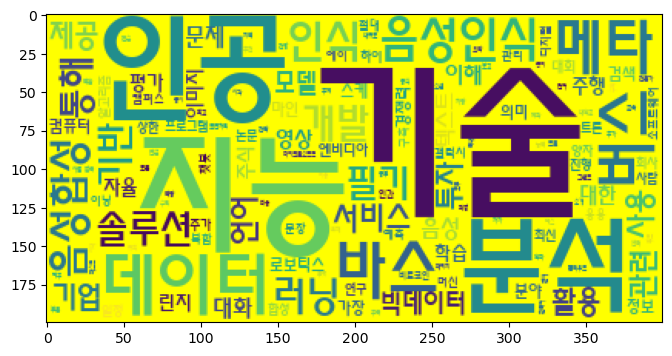

In [48]:
plt.rcParams["figure.figsize"] = (14,4) #가로 너비 14인치, 세로 높이 4인치 
plt.rcParams['axes.grid'] = False    #또는 True

fig = plt.figure() #이미지 크기가 할당됨 
print("이미지 크기 : ", fig)

#plt.axis('on' 또는 'off') : 'on'으로 설정하면 x,y축이 출력된다. 
plt.axis('on') 
plt.imshow(wc)  #위에서 설정한 WordCcloud 옵션에 따른 이미지가 화면에 출력

#출련된 워드클라우드 이미지를 파일로 저장
fig.savefig('c:/temp/자연어처리_주요키워드.png') 

<span style="color: red; font-size: 18pt">
9. 그래프를 활용하여 명사의 빈도수 시각화
</span>   

<span style="color: blue; font-size: 14pt">
명사의 빈도수를 그래프로 시각화하기
</span>

In [49]:
#그래프 그리기 위해서 필요한 모듈 임포트하기 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib 

In [50]:
#아래의 %matplotlib qt5 코드를 입력하면 시각화 결과가 새로운 윈도우 창에 출력됨
#%matplotlib qt5 

font_location="c:/windows/fonts/HMFMMUEX.TTC"  #한글 폰트를 셋팅함
font_name=fm.FontProperties(fname=font_location).get_name() 

#한글 깨짐을 방지하기 위해서 반드시 해야할 부분 
matplotlib.rc('font',family=font_name)

<span style="color:blue">  
● nltk(Natural Language Took Kit) 모듈을 활용하여 plot 그래프를 출력 <br>    
● plot(플롯)은 일반적으로 둘 이상의 변수 간의 관계를 나타내는 그래프로 데이터 세트를 나타내는 그래픽 기술  
</span>

In [51]:
from nltk.probability import FreqDist 

#FreqDist()는 딕셔너리 타입의 데이터를 셋팅해야 함
final_okt_sort_dic_graph = FreqDist(re_okt_nouns_count) 

In [52]:
type(re_okt_nouns_count)

collections.Counter

In [53]:
type(final_okt_sort_dic_graph)

nltk.probability.FreqDist

In [54]:
print(re_okt_nouns_count)

Counter({'기술': 66, '지능': 36, '인공': 28, '분석': 28, '데이터': 26, '바스': 22, '메타': 20, '버스': 20, '음성인식': 19, '인식': 15, '음성합성': 14, '개발': 13, '러닝': 13, '솔루션': 12, '필기': 11, '통해': 11, '기반': 11, '서비스': 11, '활용': 10, '제공': 10, '기업': 10, '관련': 10, '투자': 10, '언어': 10, '사용': 10, '빅데이터': 10, '모델': 10, '대화': 9, '음성': 9, '문제': 9, '텍스트': 8, '대한': 8, '이해': 8, '영상': 8, '평가': 7, '주식': 7, '자율': 7, '주행': 7, '린지': 6, '학습': 6, '이미지': 6, '컴퓨터': 6, '경쟁력': 6, '가장': 6, '로보틱스': 6, '스케': 6, '의미': 6, '검색': 6, '정보': 6, '분야': 6, '마인': 6, '엔비디아': 6, '대회': 6, '프로그램': 5, '상한': 5, '하이': 5, '트론': 5, '회사': 5, '양자': 5, '알고리즘': 5, '주가': 5, '진행': 5, '일정': 5, '연구': 5, '합성': 5, '논문': 5, '사람': 5, '최신': 5, '이닝': 4, '캠퍼스': 4, '문장': 4, '소프트웨어': 4, '갤럭시': 4, '디지털': 4, '응용': 4, '절대': 4, '예측': 4, '관리': 4, '머신': 4, '구축': 4, '챗봇': 4, '복합': 4, '에이': 4, '비트코인': 4, '인간': 4, '마이크로소프트': 4, '과정': 4, '센터': 4, '역량': 4, '소개': 4, '한국어': 4, '대규모': 4, '이용': 4, '연설': 4, '주제': 4, '교육': 4, '차량': 4, '위해': 4, '지역': 3, '모든': 3, '시각': 3, '패스트': 3, '요약': 3, 

In [55]:
print(final_okt_sort_dic_graph)

<FreqDist with 848 samples and 1828 outcomes>


In [56]:
len(final_okt_sort_dic_graph)

848

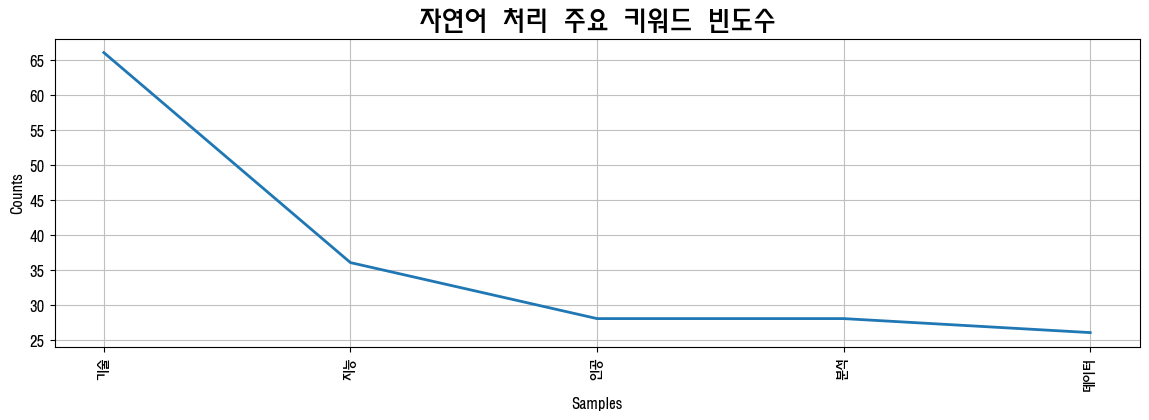

In [57]:
plt.title('자연어 처리 주요 키워드 빈도수', fontsize=20)

final_okt_sort_dic_graph.plot(5)
plt.show()